In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

df= pd.read_csv('train_1.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [2]:
df.drop_duplicates(inplace=True) 

In [3]:
df['Product_ID'].isnull().sum()

0

In [4]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [5]:
df.rename(columns={'User_ID':'UID','Product_ID':'PID','Stay_In_Current_City_Years':'living_years','Product_Category_1':'PCategory_1','Product_Category_2':'PCategory_2','Product_Category_3':'PCategory_3'},inplace=True)


In [6]:
df['living_years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [7]:
m=age_map = {
            '0-17' : 8.5,
            '18-25' : 21.5,
            '26-35' : 30.5,
            '36-45' : 40.5,
            '46-50' : 48,
            '51-55' : 53,
            '55+' : 60}

In [8]:
df['Age']=df['Age'].map(m)


In [9]:
df

,UID,PID,Gender,Age,Occupation,City_Category,living_years,Marital_Status,PCategory_1,PCategory_2,PCategory_3,Purchase
0,1000001,P00069042,F,8.5,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,8.5,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,8.5,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,8.5,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,60.0,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,53.0,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,30.5,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,30.5,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,60.0,1,C,2,0,20,NaN,NaN,365


In [10]:
d=df.groupby(['Gender','Age'])['PCategory_2'].agg(pd.Series.mode)

In [11]:
d1=pd.DataFrame(d)

In [12]:
d1

PCategory_2
Gender Age              
F      8.5           4.0
       21.5         14.0
       30.5         14.0
       40.5         14.0
       48.0         14.0
       53.0         14.0
       60.0         14.0
M      8.5           2.0
       21.5          8.0
       30.5          8.0
       40.5          8.0
       48.0          8.0
       53.0          8.0
       60.0          8.0

In [13]:
(d1.index,d1.values)

(MultiIndex([('F',  8.5),
             ('F', 21.5),
             ('F', 30.5),
             ('F', 40.5),
             ('F', 48.0),
             ('F', 53.0),
             ('F', 60.0),
             ('M',  8.5),
             ('M', 21.5),
             ('M', 30.5),
             ('M', 40.5),
             ('M', 48.0),
             ('M', 53.0),
             ('M', 60.0)],
            names=['Gender', 'Age']),
 array([[ 4.],
        [14.],
        [14.],
        [14.],
        [14.],
        [14.],
        [14.],
        [ 2.],
        [ 8.],
        [ 8.],
        [ 8.],
        [ 8.],
        [ 8.],
        [ 8.]]))

In [14]:
for val1 ,val2 in zip(d1.index,d1.values):
    df.loc[df['PCategory_2'].isnull()&(df['Gender']==val1[0])&(df['Age']==val1[1]),'PCategory_2']=val2[0]


In [15]:
dd=df.groupby(['Gender','Age'])['PCategory_3'].agg(pd.Series.mode)
d2=pd.DataFrame(dd)
d2

PCategory_3
Gender Age              
F      8.5           5.0
       21.5         16.0
       30.5         16.0
       40.5         16.0
       48.0         16.0
       53.0         14.0
       60.0         14.0
M      8.5          16.0
       21.5         16.0
       30.5         16.0
       40.5         16.0
       48.0         16.0
       53.0         16.0
       60.0         16.0

In [16]:
for val1 ,val2 in zip(d2.index,d2.values):
    df.loc[df['PCategory_3'].isnull()&(df['Gender']==val1[0])&(df['Age']==val1[1]),'PCategory_3']=val2[0]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             550068 non-null  int64  
 1   PID             550068 non-null  object 
 2   Gender          550068 non-null  object 
 3   Age             550068 non-null  float64
 4   Occupation      550068 non-null  int64  
 5   City_Category   550068 non-null  object 
 6   living_years    550068 non-null  object 
 7   Marital_Status  550068 non-null  int64  
 8   PCategory_1     550068 non-null  int64  
 9   PCategory_2     550068 non-null  float64
 10  PCategory_3     550068 non-null  float64
 11  Purchase        550068 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 54.6+ MB


In [18]:
df.head(20)

,UID,PID,Gender,Age,Occupation,City_Category,living_years,Marital_Status,PCategory_1,PCategory_2,PCategory_3,Purchase
0,1000001,P00069042,F,8.5,10,A,2,0,3,4.0,5.0,8370
1,1000001,P00248942,F,8.5,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,8.5,10,A,2,0,12,4.0,5.0,1422
3,1000001,P00085442,F,8.5,10,A,2,0,12,14.0,5.0,1057
4,1000002,P00285442,M,60.0,16,C,4+,0,8,8.0,16.0,7969
5,1000003,P00193542,M,30.5,15,A,3,0,1,2.0,16.0,15227
6,1000004,P00184942,M,48.0,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,48.0,7,B,2,1,1,15.0,16.0,15854
8,1000004,P0097242,M,48.0,7,B,2,1,1,16.0,16.0,15686
9,1000005,P00274942,M,30.5,20,A,1,1,8,8.0,16.0,7871


<Axes: xlabel='Gender', ylabel='count'>

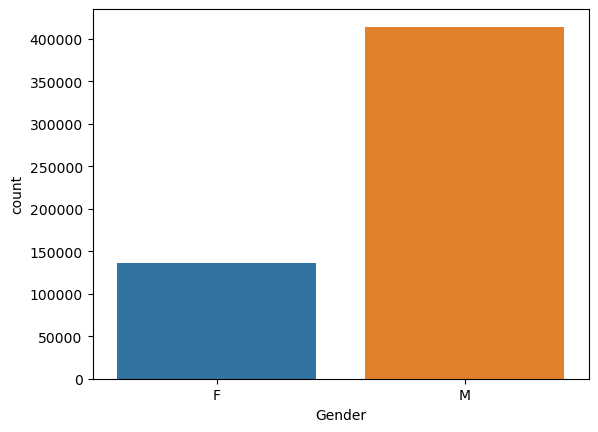

In [20]:
sns.countplot(x='Gender',data=df)

Count of Male customers is higher tham female 


In [21]:
df['Marital_Status']=df['Marital_Status'].replace({1:'YES',0:'No'})

<Axes: xlabel='Marital_Status', ylabel='count'>

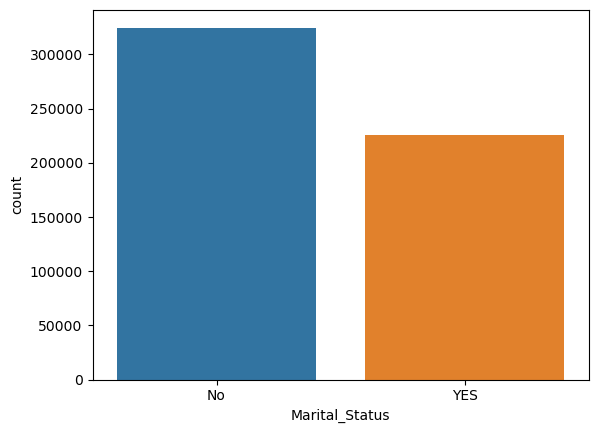

In [22]:
sns.countplot(x='Marital_Status',data=df)

Count of unmarried customer are high than mrried customer 

<Axes: xlabel='City_Category', ylabel='Purchase'>

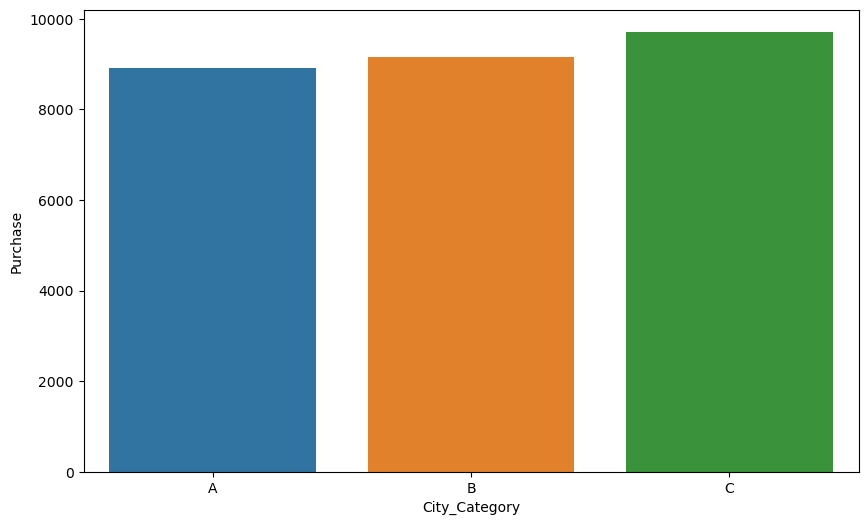

In [23]:
a=df.groupby('City_Category')['Purchase'].mean()
a1=pd.DataFrame(a)
a1=a1.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='City_Category',y='Purchase',data=a1)

All three city catgory have almost equal Avg purches

C city Category has higest avg purchases Around 9500+

All three city category has 8000+ avg Purchases 

<Axes: xlabel='Occupation', ylabel='count'>

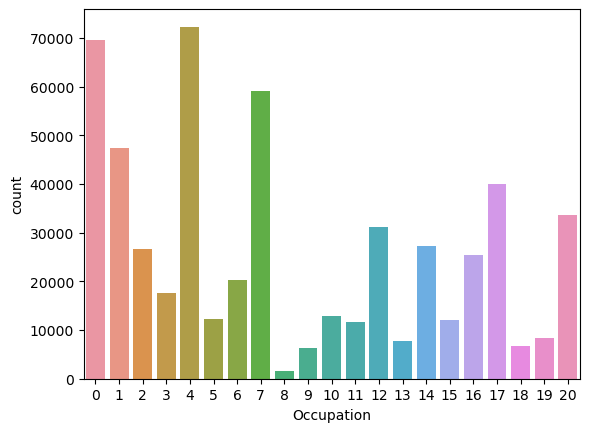

In [24]:
sns.countplot(x='Occupation',data=df)

4 occupation customers are higest count and 0 occupation has second Higest count 

0 to 3 occuption count decrease linearly 




<Axes: xlabel='Age', ylabel='count'>

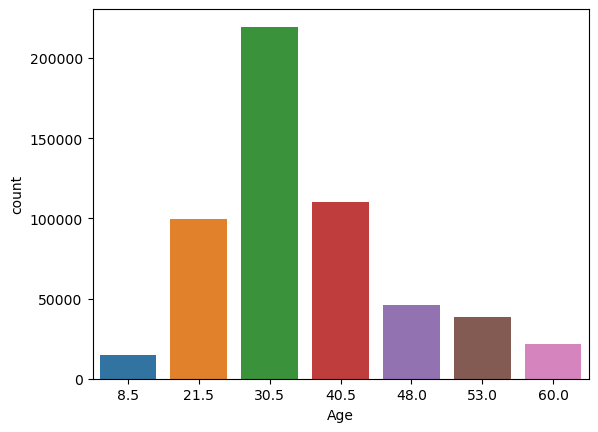

In [25]:
sns.countplot(x='Age',data=df)

30 age group of customers has higest count 

30 to 60 age count decrease linierly

21 to 40 age group has maximum count of customers 

<Axes: xlabel='Occupation', ylabel='Purchase'>

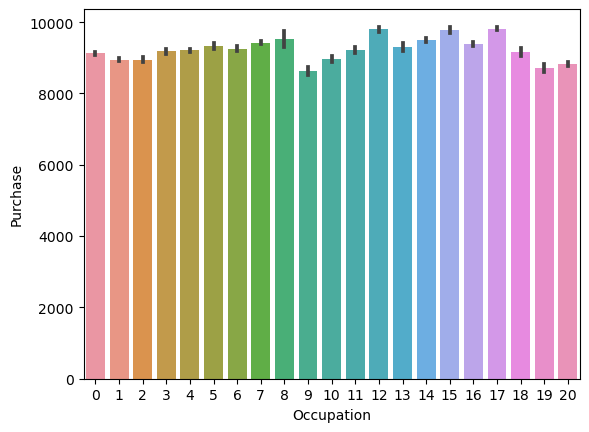

In [27]:
sns.barplot(x='Occupation',y='Purchase',data=df)

all types of customer has more 8000+ purchases 
9 occupations has lowest customer count 

<Axes: xlabel='PCategory_3', ylabel='Purchase'>

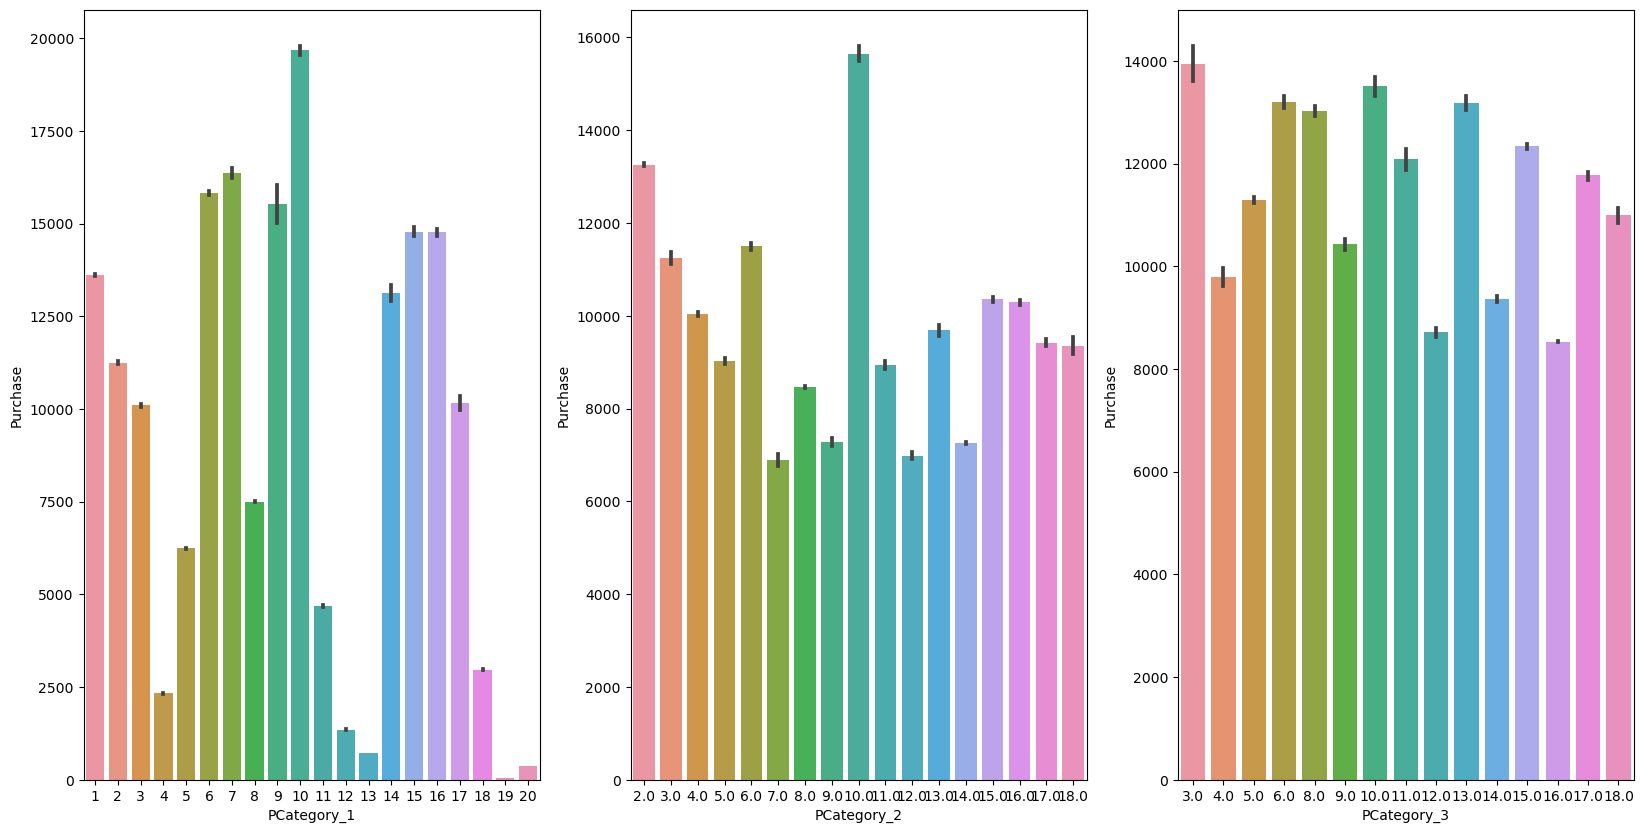

In [28]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.barplot(x='PCategory_1',y='Purchase',data=df)
plt.subplot(1,3,2)
sns.barplot(x='PCategory_2',y='Purchase',data=df)
plt.subplot(1,3,3)
sns.barplot(x='PCategory_3',y='Purchase',data=df)

product no 10 is almost high purchase amoung all 3 product category

product category 1 has lowest selling product category is 19,12,13,20 


In [29]:
c=df['City_Category'].value_counts()

([<matplotlib.patches.Wedge at 0x24f66c50b90>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42%'),
  Text(-0.5331294664510843, -0.27526890852688435, '31%'),
  Text(0.3988350646218405, -0.4482528206582668, '27%')])

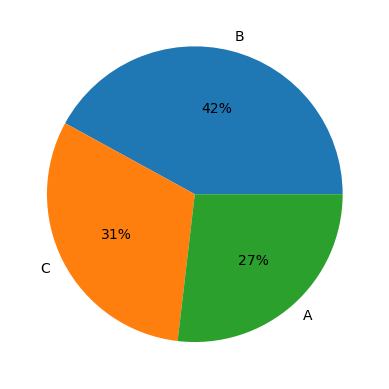

In [30]:
plt.pie(c,labels=c.index,autopct='%.0f%%')

city category B has higest 42% purchases
company have imporve it sell in category C and A

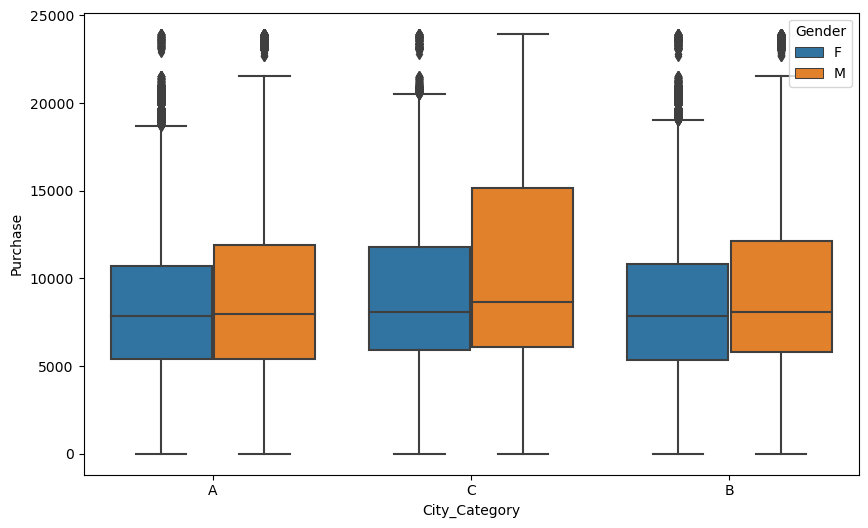

In [34]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x="City_Category", y="Purchase", hue="Gender", data=df)
plt.legend(title='Gender', loc='upper right')
plt.show()


males has higher no of purchases compared to female in all three category

<Axes: xlabel='Age', ylabel='Purchase'>

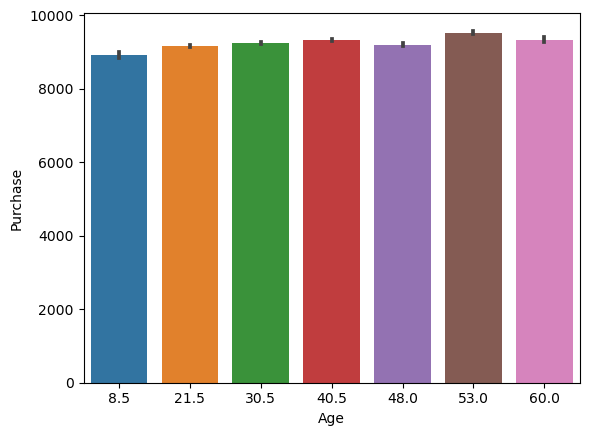

In [37]:
sns.barplot(x='Age',y='Purchase',data=df)

Age vs Purchased
All age group has more than 8000+ purchase 
53 age group has higest purchase 

